In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# 1. Завантаження датасету
file_path = r'C:\Users\User\Desktop\user_behavior_dataset.csv'
data = pd.read_csv(file_path)

# Вивід перших 5 рядків для перевірки
print(data.head())

# 2. Передобробка даних
# Вибираємо числові колонки для ознак і цільову змінну
features = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
            'Battery Drain (mAh/day)', 'Number of Apps Installed', 
            'Data Usage (MB/day)', 'Age']

target = 'User Behavior Class'

# Розділення на ознаки (X) та цільову змінну (y)
X = data[features]
y = data[target]

# Нормалізація числових даних
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Кодування цільової змінної
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Поділ даних на тренувальні і тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Перетворення у тензори PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# 3. Реалізація нейромережі
class FCN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

input_size = X_train.shape[1]  # Кількість ознак
hidden_size = 64               # Кількість нейронів у прихованому шарі
num_classes = len(encoder.classes_)  # Кількість класів у цільовій змінній

model = FCN(input_size, hidden_size, num_classes)

# 4. Функція втрат і оптимізатор
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 5. Навчання моделі
num_epochs = 30
for epoch in range(num_epochs):
    # Пряме поширення
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Зворотне поширення
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 6. Оцінка моделі
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    _, y_pred_classes = torch.max(y_pred, 1)
    accuracy = accuracy_score(y_test, y_pred_classes)
    print(f'Test Accuracy: {accuracy:.2f}')
    print("Classification Report:\n", classification_report(y_test, y_pred_classes, target_names=[str(c) for c in encoder.classes_], zero_division=0))

   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                

In [9]:
# Завдання 2: навчити мережу з нуля
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Шлях до папки з даними
data_dir = r"C:\Users\User\Desktop\TomAndJerry\tom_and_jerry"

# Параметри
batch_size = 32
img_height = 128
img_width = 128

# Генератор даних
datagen = ImageDataGenerator(validation_split=0.2, rescale=1.0 / 255.0)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Модель з нуля
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 класи
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Навчання
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Оцінка моделі
test_loss, test_acc = model.evaluate(val_data)
print(f"Validation Accuracy: {test_acc:.2f}")


Found 4383 images belonging to 4 classes.
Found 1095 images belonging to 4 classes.
Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 115s 825ms/step - accuracy: 0.3927 - loss: 1.3015 - val_accuracy: 0.4228 - val_loss: 1.2985
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 49s 359ms/step - accuracy: 0.6287 - loss: 0.9028 - val_accuracy: 0.5242 - val_loss: 1.2688
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 50s 366ms/step - accuracy: 0.7986 - loss: 0.5533 - val_accuracy: 0.5361 - val_loss: 1.1437
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 50s 366ms/step - accuracy: 0.8744 - loss: 0.3391 - val_accuracy: 0.5169 - val_loss: 1.3048
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 51s 368ms/step - accuracy: 0.9205 - loss: 0.2225 - val_accuracy: 0.5589 - val_loss: 1.4238
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 50s 365ms/step - accuracy: 0.9490 - loss: 0.1550 - val_accuracy: 0.5489 - val_loss: 1.6995
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 53s 387ms/step - accuracy: 0.9541 - loss: 0.1252 - val_accuracy: 0.5900 - val_loss: 1.740

In [10]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Шлях до папки з даними
data_dir = r"C:\Users\User\Desktop\TomAndJerry\tom_and_jerry"

# Параметри
batch_size = 32
img_height = 128
img_width = 128

# Генератор даних
datagen = ImageDataGenerator(validation_split=0.2, rescale=1.0 / 255.0)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Завантаження попередньо натренованої моделі VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Заморожуємо базову модель
base_model.trainable = False

# Додаємо власний класифікатор
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # 4 класи
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Навчання
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Оцінка моделі
test_loss, test_acc = model.evaluate(val_data)
print(f"Validation Accuracy: {test_acc:.2f}")


Found 4383 images belonging to 4 classes.
Found 1095 images belonging to 4 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.3933 - loss: 1.5083 - val_accuracy: 0.4429 - val_loss: 1.2403
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.5768 - loss: 0.9772 - val_accuracy: 0.4968 - val_loss: 1.2471
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.6572 - loss: 0.8093 - val_accuracy: 0.5151 - val_loss: 1.1823
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - accuracy: 0.7134 - loss: 0.6985 - val_accuracy: 0.4831 - val_loss: 1.2077
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.7399 - loss: 0.6583 - val_accuracy: 0.5178 - val_loss: 1.2703
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.7570 - loss: 0.5889 - val_accuracy: 0.5288 - val_loss: 1.2285
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 364s 3s/step - accuracy: 0.7971 - loss: 0.5184 - va

In [ ]:
Порівнючи два способи, можна сказати, що обидва варіанти справилися не дуже вдало, проте при навчанні моделі з нуля точність моделі є вищою - 0.58 проти 0.49. 
Крім того, у першому випадку модель спрацювала набагато швидше (приблизно 1.5 хвилини проти приблизно 30 хв)

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 239ms/step - accuracy: 0.5069 - loss: 0.6927 - val_accuracy: 0.5125 - val_loss: 0.6931
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 238ms/step - accuracy: 0.6166 - loss: 0.6668 - val_accuracy: 0.5975 - val_loss: 0.7010
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 256ms/step - accuracy: 0.8769 - loss: 0.3244 - val_accuracy: 0.5500 - val_loss: 0.9005
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 268ms/step - accuracy: 0.9664 - loss: 0.0857 - val_accuracy: 0.5525 - val_loss: 1.3515
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 274ms/step - accuracy: 0.9838 - loss: 0.0440 - val_accuracy: 0.5775 - val_loss: 1.4514


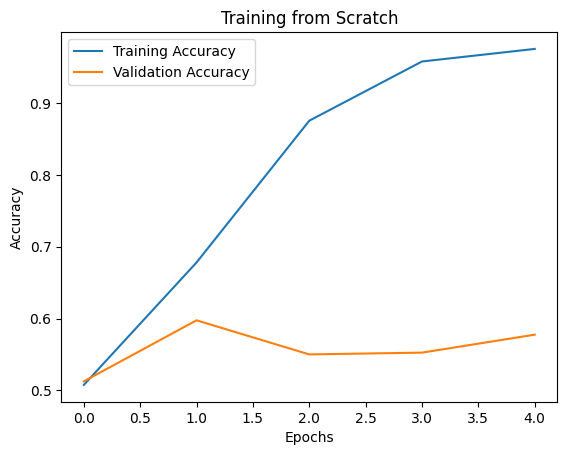

In [12]:
# завдання 3 - реалізація з нуля
import nltk
from nltk.corpus import movie_reviews
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

# Завантаження необхідних ресурсів
nltk.download('movie_reviews')

# Створення списків текстів та міток
texts = [" ".join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]
labels = [1 if category == 'pos' else 0 for category in movie_reviews.categories() for _ in movie_reviews.fileids(category)]

# Поділ на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Токенізація тексту
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Паддинг послідовностей
max_len = 300
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Перетворення міток у numpy
y_train = np.array(y_train)
y_test = np.array(y_test)

# Побудова моделі
model_scratch = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),  # Embedding шар
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Бінарна класифікація
])

# Компіляція моделі
model_scratch.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Навчання моделі
history_scratch = model_scratch.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=5,
    batch_size=32
)

# Побудова графіків точності
plt.plot(history_scratch.history['accuracy'], label='Training Accuracy')
plt.plot(history_scratch.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training from Scratch")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 199ms/step - accuracy: 0.4966 - loss: 0.7058 - val_accuracy: 0.5175 - val_loss: 0.6904
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - accuracy: 0.5253 - loss: 0.6859 - val_accuracy: 0.5850 - val_loss: 0.6790
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 224ms/step - accuracy: 0.5474 - loss: 0.6866 - val_accuracy: 0.5475 - val_loss: 0.6815
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step - accuracy: 0.5968 - loss: 0.6649 - val_accuracy: 0.5800 - val_loss: 0.6814
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 229ms/step - accuracy: 0.6292 - loss: 0.6569 - val_accuracy: 0.5875 - val_loss: 0.6689


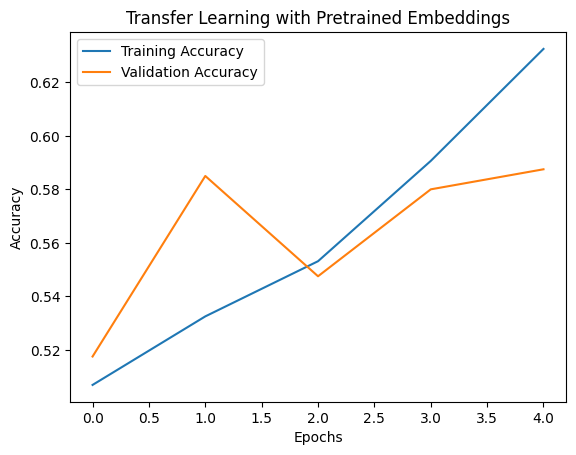

In [16]:
# завдання 3 - використовуючи pretrained word embeddings
import nltk
from nltk.corpus import movie_reviews
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

# Завантаження необхідних ресурсів
nltk.download('movie_reviews')

# Створення списків текстів та міток
texts = [" ".join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]
labels = [1 if category == 'pos' else 0 for category in movie_reviews.categories() for _ in movie_reviews.fileids(category)]

# Поділ на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Токенізація тексту
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Паддинг послідовностей
max_len = 300
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Перетворення міток у numpy
y_train = np.array(y_train)
y_test = np.array(y_test)

# Завантаження GloVe
embedding_index = {}
with open(r'C:\Users\User\Desktop\glove.6B\glove.6B.100d.txt', encoding='utf-8') as f: 
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

# Створення матриці векторів для Embedding шару
embedding_dim = 100
embedding_matrix = np.zeros((10000, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < 10000:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Побудова моделі
model_pretrained = Sequential([
    Embedding(input_dim=10000, output_dim=embedding_dim, weights=[embedding_matrix],
              input_length=max_len, trainable=False),  # Embedding шар з GloVe
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Бінарна класифікація
])

# Компіляція моделі
model_pretrained.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Навчання моделі
history_pretrained = model_pretrained.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=5,
    batch_size=32
)

# Побудова графіків точності
plt.plot(history_pretrained.history['accuracy'], label='Training Accuracy')
plt.plot(history_pretrained.history['val_accuracy'], label='Validation Accuracy')
plt.title("Transfer Learning with Pretrained Embeddings")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
